In [31]:
import re
import os  # for OS interface (to get/change directory)
# display and set working/data directory
os.getcwd()
os.chdir('dir')
os.getcwd()

'dir'

In [32]:
#import required packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [33]:
#import dataset without unwanted columns 
dataset=pd.read_csv('GCMF10k_6.csv')
dataset=dataset.dropna()
dataset=dataset.filter(["Fraud","Years_Married", "Children", "ChildrenBeforeMarriage_Uscitizen",
                        "Previously_Married_Uscitizen", "Previously_Denied_Visa_Immigrant",
                        "Foreign_Residence_Requirement_Immigrant","History_of_Crime_UScitizen",
                        "Expired_Passport_Marriage" ,"HigherEducation_Uscitizen", "Employment_Uscitizen",
                        "Employment_Immigrant","Annual_Income_Immigrant","Annual_Income_Uscitizen",
                        "Sex_Immigrant","Sex_Uscitizen","HigherEducation_Immigrant","Citizenship_Immigrant"])

print(dataset.shape)
print(list(dataset.columns))

(9960, 18)
['Fraud', 'Years_Married', 'Children', 'ChildrenBeforeMarriage_Uscitizen', 'Previously_Married_Uscitizen', 'Previously_Denied_Visa_Immigrant', 'Foreign_Residence_Requirement_Immigrant', 'History_of_Crime_UScitizen', 'Expired_Passport_Marriage', 'HigherEducation_Uscitizen', 'Employment_Uscitizen', 'Employment_Immigrant', 'Annual_Income_Immigrant', 'Annual_Income_Uscitizen', 'Sex_Immigrant', 'Sex_Uscitizen', 'HigherEducation_Immigrant', 'Citizenship_Immigrant']


In [34]:
dataset.describe()

,Years_Married,Children
count,9960.000000,9960.000000
mean,7.495080,1.263554
std,4.594598,1.747466
min,0.000000,0.000000
25%,3.000000,0.000000
50%,7.000000,0.000000
75%,12.000000,3.000000
max,15.000000,5.000000


In [35]:
#split Fraud column
X=dataset.drop('Fraud',axis=1)
y=dataset['Fraud']
X.head()

,Years_Married,Children,ChildrenBeforeMarriage_Uscitizen,Previously_Married_Uscitizen,Previously_Denied_Visa_Immigrant,Foreign_Residence_Requirement_Immigrant,History_of_Crime_UScitizen,Expired_Passport_Marriage,HigherEducation_Uscitizen,Employment_Uscitizen,Employment_Immigrant,Annual_Income_Immigrant,Annual_Income_Uscitizen,Sex_Immigrant,Sex_Uscitizen,HigherEducation_Immigrant,Citizenship_Immigrant
0,6,0,Yes,Yes,Yes,No,No,No,No,Temporary,FT,"$138,348.00","$49,296.00",M,F,No,Vietnam
1,1,0,Yes,No,No,Yes,Yes,Yes,No,FT,FT,"$180,444.00","$176,304.00",M,F,Yes,Vietnam
2,4,0,Yes,Yes,No,No,No,No,No,PT,FT,"$89,580.00","$47,184.00",M,F,Yes,Guatemala
3,14,0,No,Yes,Yes,No,Yes,No,No,PT,FT,"$179,400.00","$58,092.00",M,F,Yes,El Salvador
4,6,0,Yes,No,No,No,Yes,No,No,Temporary,PT,"$45,696.00","$57,312.00",M,F,No,Philippines


In [36]:
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
9995     No
9996     No
9997     No
9998     No
9999     No
Name: Fraud, Length: 9960, dtype: object

In [37]:
#preprocessing #1
X=pd.get_dummies(X, columns=X.columns, drop_first=True)
X.head()

,Years_Married_1,Years_Married_2,Years_Married_3,Years_Married_4,Years_Married_5,Years_Married_6,Years_Married_7,Years_Married_8,Years_Married_9,Years_Married_10,...,HigherEducation_Immigrant_Yes,Citizenship_Immigrant_Cuba,Citizenship_Immigrant_Dominican Republic,Citizenship_Immigrant_El Salvador,Citizenship_Immigrant_Guatemala,Citizenship_Immigrant_India,Citizenship_Immigrant_Mexico,Citizenship_Immigrant_Philippines,Citizenship_Immigrant_South Korea,Citizenship_Immigrant_Vietnam
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#split test and training data into 20:80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#preprocessing #2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#prepare for a training and test result reports 
def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train, classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train, classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{}\n'.format(res.mean()))
        print('Standard Deviation:\t{}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test, classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [41]:
#Apply Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 3, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=42)

In [42]:
#Training Results 
print_score(classifier, X_train, y_train, X_test, y_test, train=True)

Training results:

Accuracy Score: 0.9781626506024096

Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      4023
         Yes       0.98      0.98      0.98      3945

    accuracy                           0.98      7968
   macro avg       0.98      0.98      0.98      7968
weighted avg       0.98      0.98      0.98      7968


Confusion Matrix:
[[3932   91]
 [  83 3862]]

Average Accuracy:	0.8724907669296587

Standard Deviation:	0.021824543468581745


In [43]:
#Test Results 
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy Score: 0.8704819277108434

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.87      0.86       950
         Yes       0.88      0.87      0.88      1042

    accuracy                           0.87      1992
   macro avg       0.87      0.87      0.87      1992
weighted avg       0.87      0.87      0.87      1992


Confusion Matrix:
[[826 124]
 [134 908]]



In [44]:
#Feature importances
classifier.feature_importances_

array([0.00277803, 0.00399469, 0.00270457, ..., 0.00398394, 0.003348  ,
       0.00373409])

In [45]:
#Sort the Features 
rank=classifier.feature_importances_
indices = np.argsort(rank)[::-1]
#Select top_k features
top_k = 16
new_indices = indices[:top_k]
for i in enumerate(new_indices):
    print(i)

(0, 20)
(1, 12447)
(2, 19)
(3, 15)
(4, 26)
(5, 16)
(6, 18)
(7, 17)
(8, 25)
(9, 29)
(10, 12446)
(11, 27)
(12, 28)
(13, 23)
(14, 12448)
(15, 21)


In [46]:
print("Feature ranking:")
width_graph =[]

for f in range(top_k):
    print("%d. %s (%f)" % (f + 1, X.columns[new_indices[f]], rank[new_indices[f]]))
    width_graph.append(rank[new_indices[f]])

Feature ranking:
1. ChildrenBeforeMarriage_Uscitizen_Yes (0.124106)
2. Sex_Uscitizen_M (0.051085)
3. Children_5 (0.048817)
4. Children_1 (0.048354)
5. HigherEducation_Uscitizen_Yes (0.048116)
6. Children_2 (0.047096)
7. Children_4 (0.043417)
8. Children_3 (0.025670)
9. Expired_Passport_Marriage_Yes (0.021788)
10. Employment_Uscitizen_Unemployed (0.017337)
11. Sex_Immigrant_M (0.016105)
12. Employment_Uscitizen_PT (0.013437)
13. Employment_Uscitizen_Temporary (0.012884)
14. Foreign_Residence_Requirement_Immigrant_Yes (0.008892)
15. HigherEducation_Immigrant_Yes (0.008561)
16. Previously_Married_Uscitizen_Yes (0.007785)


Index(['ChildrenBeforeMarriage_Uscitizen_Yes', 'Sex_Uscitizen_M', 'Children_5',
       'Children_1', 'HigherEducation_Uscitizen_Yes', 'Children_2',
       'Children_4', 'Children_3', 'Expired_Passport_Marriage_Yes',
       'Employment_Uscitizen_Unemployed', 'Sex_Immigrant_M',
       'Employment_Uscitizen_PT', 'Employment_Uscitizen_Temporary',
       'Foreign_Residence_Requirement_Immigrant_Yes',
       'HigherEducation_Immigrant_Yes', 'Previously_Married_Uscitizen_Yes'],
      dtype='object')


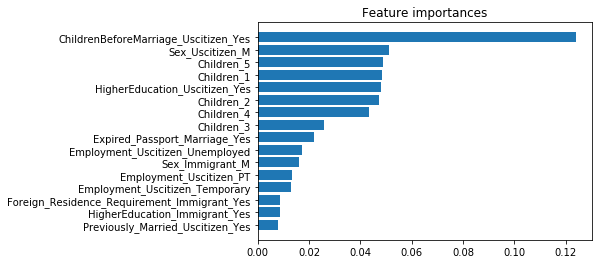

In [47]:
#Create a feature importance chart
plt.figure()
plt.title("Feature importances")
top_features = X.columns[new_indices]
print(top_features)
plt.barh(top_features[::-1], width_graph[::-1], align="center")
plt.show()

In [48]:
# ROC_AUC curve
from sklearn.metrics import roc_curve
metrics = confusion_matrix(y_train, classifier.predict(X_train))

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label = 'Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc score="+str(auc))
plt.legend(loc=4)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'roc_curve'

In [ ]:
#ROC_AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

In [29]:
#Import New Dataset for Testing

In [66]:
#Input the new dataset into the dir
NewX=pd.read_csv('dir.csv')
NewX=NewX.dropna()
NewX=NewX.filter(["Fraud","Years_Married", "Children", "ChildrenBeforeMarriage_Uscitizen",
                        "Previously_Married_Uscitizen", "Previously_Denied_Visa_Immigrant",
                        "Foreign_Residence_Requirement_Immigrant","History_of_Crime_UScitizen",
                        "Expired_Passport_Marriage" ,"HigherEducation_Uscitizen", "Employment_Uscitizen",
                        "Employment_Immigrant","Annual_Income_Immigrant","Annual_Income_Uscitizen",
                        "Sex_Immigrant","Sex_Uscitizen","HigherEducation_Immigrant","Citizenship_Immigrant"])

(9960, 17)
['Years_Married', 'Children', 'ChildrenBeforeMarriage_Uscitizen', 'Previously_Married_Uscitizen', 'Previously_Denied_Visa_Immigrant', 'Foreign_Residence_Requirement_Immigrant', 'History_of_Crime_UScitizen', 'Expired_Passport_Marriage', 'HigherEducation_Uscitizen', 'Employment_Uscitizen', 'Employment_Immigrant', 'Annual_Income_Immigrant', 'Annual_Income_Uscitizen', 'Sex_Immigrant', 'Sex_Uscitizen', 'HigherEducation_Immigrant', 'Citizenship_Immigrant']


In [76]:
#Preprocessing
NewX=pd.get_dummies(NewX, columns=NewX.columns, drop_first=True)
NewX_train, NewX_test, y_train, y_test = train_test_split(NewX, y, test_size=0.2, random_state=42)
sc = StandardScaler()
NewX_train = sc.fit_transform(NewX_train)
NewX_test = sc.transform(NewX_test)
classifier = RandomForestClassifier(n_estimators = 3, criterion='entropy', random_state=42)
classifier.fit(NewX_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=42)

In [77]:
#Training Results with the new dataset
print_score(classifier, NewX_train, y_train, NewX_test, y_test, train=True)

Training results:

Accuracy Score: 0.9809236947791165

Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      4023
         Yes       0.98      0.98      0.98      3945

    accuracy                           0.98      7968
   macro avg       0.98      0.98      0.98      7968
weighted avg       0.98      0.98      0.98      7968


Confusion Matrix:
[[3945   78]
 [  74 3871]]

Average Accuracy:	0.870608551685897

Standard Deviation:	0.01501991277303383


In [79]:
#Test Results with the new dataset
print_score(classifier, NewX_train, y_train, NewX_test, y_test, train=False)

Test results:

Accuracy Score: 0.875

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.89      0.87       950
         Yes       0.89      0.86      0.88      1042

    accuracy                           0.88      1992
   macro avg       0.87      0.88      0.87      1992
weighted avg       0.88      0.88      0.88      1992


Confusion Matrix:
[[842 108]
 [141 901]]



In [80]:
#Feature importance of the new data
print("Feature ranking:")
width_graph =[]

for f in range(top_k):
    print("%d. %s (%f)" % (f + 1, NewX.columns[new_indices[f]], rank[new_indices[f]]))
    width_graph.append(rank[new_indices[f]])

Feature ranking:
1. ChildrenBeforeMarriage_Uscitizen_Yes (0.124106)
2. Sex_Uscitizen_M (0.051085)
3. Children_5 (0.048817)
4. Children_1 (0.048354)
5. HigherEducation_Uscitizen_Yes (0.048116)
6. Children_2 (0.047096)
7. Children_4 (0.043417)
8. Children_3 (0.025670)
9. Expired_Passport_Marriage_Yes (0.021788)
10. Employment_Uscitizen_Unemployed (0.017337)
11. Sex_Immigrant_M (0.016105)
12. Employment_Uscitizen_PT (0.013437)
13. Employment_Uscitizen_Temporary (0.012884)
14. Foreign_Residence_Requirement_Immigrant_Yes (0.008892)
15. HigherEducation_Immigrant_Yes (0.008561)
16. Previously_Married_Uscitizen_Yes (0.007785)


Index(['ChildrenBeforeMarriage_Uscitizen_Yes', 'Sex_Uscitizen_M', 'Children_5',
       'Children_1', 'HigherEducation_Uscitizen_Yes', 'Children_2',
       'Children_4', 'Children_3', 'Expired_Passport_Marriage_Yes',
       'Employment_Uscitizen_Unemployed', 'Sex_Immigrant_M',
       'Employment_Uscitizen_PT', 'Employment_Uscitizen_Temporary',
       'Foreign_Residence_Requirement_Immigrant_Yes',
       'HigherEducation_Immigrant_Yes', 'Previously_Married_Uscitizen_Yes'],
      dtype='object')


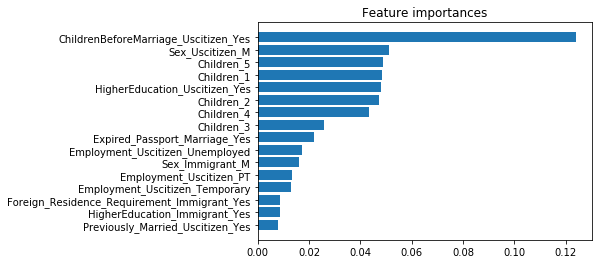

In [83]:
#Create a feature importance chart
plt.figure()
plt.title("Feature importances")
top_features = NewX.columns[new_indices]
print(top_features)
plt.barh(top_features[::-1], width_graph[::-1], align="center")
plt.show()

In [84]:
#ROC_AUC score
roc_auc_score(y_test, classifier.predict_proba(NewX_test)[:,1])

0.9275401555712699